In [164]:
import numpy as np
np.random.seed(10)

In [165]:
from keras.utils import np_utils

In [166]:
from keras.datasets import mnist

In [167]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [168]:
print('shape of train image=', x_train_image.shape)
print('shape of test image=', x_test_image.shape)

shape of train image= (60000, 28, 28)
shape of test image= (10000, 28, 28)


In [169]:
reshape_dim = 28 * 28
x_train_reshaped = x_train_image.reshape(60000, reshape_dim).astype('float32')
x_test_reshaped = x_test_image.reshape(10000, reshape_dim).astype('float32')

In [170]:
x_train_normalized = x_train_reshaped / 255
x_test_normalized = x_test_reshaped / 255

In [171]:
print(y_train_label[:5])
print(y_test_label[:5])

[5 0 4 1 9]
[7 2 1 0 4]


In [172]:
y_train_oneHotEncoding = np_utils.to_categorical(y_train_label)
y_test_oneHotEncoding = np_utils.to_categorical(y_test_label)

In [173]:
print(y_train_oneHotEncoding[:5])
print(y_test_oneHotEncoding[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [174]:
print(x_train_normalized.shape)
print(y_train_oneHotEncoding.shape)

(60000, 784)
(60000, 10)


In [175]:
from keras.models import Sequential
from keras.layers import Dense

In [176]:
from keras.layers import Dropout

In [177]:
model = Sequential()

In [178]:
model.add( Dense(units=512, input_dim=784, kernel_initializer='normal', activation='relu') )
model.add( Dropout(0.5))

In [179]:
model.add( Dense(units=128, input_dim=784, kernel_initializer='normal', activation='relu') )
model.add( Dropout(0.5))

In [180]:
model.add( Dense(units=10, kernel_initializer='normal', activation='softmax') )

In [181]:
print( model.summary() )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None


In [182]:
model.compile( loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [183]:
train_history = model.fit( x=x_train_normalized, y=y_train_oneHotEncoding, validation_split=0.2, epochs=10, batch_size=50, verbose=2)
# note: verbose=2 means to show the training process

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.4223 - acc: 0.8714 - val_loss: 0.1431 - val_acc: 0.9567
Epoch 2/10
 - 5s - loss: 0.1973 - acc: 0.9421 - val_loss: 0.1063 - val_acc: 0.9695
Epoch 3/10
 - 5s - loss: 0.1534 - acc: 0.9560 - val_loss: 0.0937 - val_acc: 0.9722
Epoch 4/10
 - 5s - loss: 0.1328 - acc: 0.9607 - val_loss: 0.0951 - val_acc: 0.9711
Epoch 5/10
 - 5s - loss: 0.1167 - acc: 0.9649 - val_loss: 0.0887 - val_acc: 0.9740
Epoch 6/10
 - 5s - loss: 0.1062 - acc: 0.9679 - val_loss: 0.0839 - val_acc: 0.9762
Epoch 7/10
 - 5s - loss: 0.0966 - acc: 0.9708 - val_loss: 0.0767 - val_acc: 0.9782
Epoch 8/10
 - 5s - loss: 0.0943 - acc: 0.9710 - val_loss: 0.0847 - val_acc: 0.9754
Epoch 9/10
 - 5s - loss: 0.0873 - acc: 0.9737 - val_loss: 0.0851 - val_acc: 0.9769
Epoch 10/10
 - 5s - loss: 0.0839 - acc: 0.9739 - val_loss: 0.0815 - val_acc: 0.9788


In [186]:
import matplotlib.pyplot as pyplot
def my_show_train_history(input_train_history, input_train, input_validation):
    pyplot.plot(input_train_history.history[input_train] )
    pyplot.plot(input_train_history.history[input_validation])
    pyplot.title('Train History')
    pyplot.ylabel(input_train)
    # pyplot.ylabel('Accuracy')
    pyplot.xlabel('Epoch')
    pyplot.legend(['my_train','my_validation'], loc='upper left')
    pyplot.show()

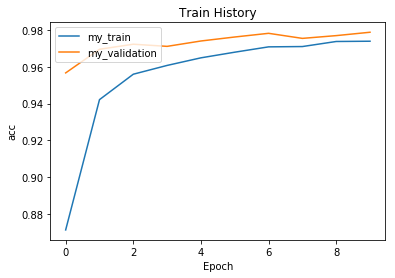

In [187]:
my_show_train_history(train_history, 'acc', 'val_acc')

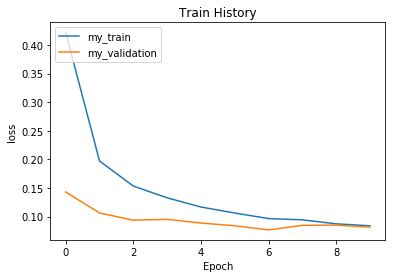

In [188]:
my_show_train_history(train_history, 'loss', 'val_loss')

In [189]:
# after training (and validation), then using public test_data for evaluation 
scores = model.evaluate(x_test_normalized, y_test_oneHotEncoding)
print(scores)
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 67us/step
[0.0717360016580904, 0.9798]
accuracy= 0.9798


In [190]:
prediction = model.predict_classes(x_test_normalized)

In [191]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [192]:
import matplotlib.pyplot as pyplot
def my_plot_images_labels_prediction(input_images, input_labels, input_prediction, input_index, input_num=10):
    fig = pyplot.gcf()
    fig.set_size_inches(12,14)
    if input_num>10:
        input_num=10
    for i in range(0, input_num):
        ax = pyplot.subplot(5,5,1+i)
        ax.imshow(input_images[input_index], cmap='binary')
        title = "label=" + str(input_labels[input_index])
        if len(input_prediction)>0:
            title= title + ", predict=" + str(input_prediction[input_index])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        input_index = input_index + 1
    pyplot.show()

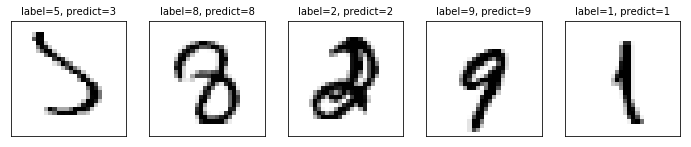

In [198]:
my_plot_images_labels_prediction(x_test_image, y_test_label, prediction, input_index=1393, input_num=5)

In [199]:
# confusion matrix
import pandas as pd
pd.crosstab(y_test_label, prediction, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,0,0,0,0,1,2,1,2,1
1,0,1126,3,0,0,0,3,0,3,0
2,2,2,1014,0,1,0,2,5,6,0
3,1,0,3,988,0,3,0,6,2,7
4,0,0,0,0,956,0,5,3,2,16
5,2,0,0,4,0,874,5,1,4,2
6,4,2,0,0,3,3,945,0,1,0
7,2,7,7,3,0,0,0,1001,2,6
8,6,0,4,6,4,3,3,2,944,2


In [200]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [201]:
df[:2]

,label,predict
0,7,7
1,2,2


In [202]:
# find "label=5, but predict=3"
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2810,5,3
4360,5,3
5937,5,3


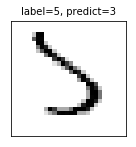

In [204]:
my_plot_images_labels_prediction(x_test_image, y_test_label, prediction, input_index=1393, input_num=1)